# ECE 5470 Lab 5 Report
### by Cynthia Li (xl827)

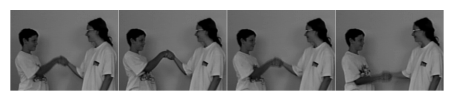

Four 'logo' sized frames from hand.vs
<scaled size: (226 x 1205) >


In [119]:
import numpy as np
from v4 import vx
from v4 import vd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# example display of selected frames
exec(vx.vxsh( 'vclip f=1 hand.vs of=dhand' )) 
for i in (6, 11, 15):
    exec(vx.vxsh( 'vclip f=$i hand.vs | vxfile of=dhand' ))
exec(vx.vxsh( 'vtile dhand n=4,1 -ib -xb of=dhandt' ))
vd.dispmvx("dhandt", size=0.7, capt="Four 'logo' sized frames from hand.vs")

## Section 2 Feature tracking
### 2.1 Tracking Imge Features in Time

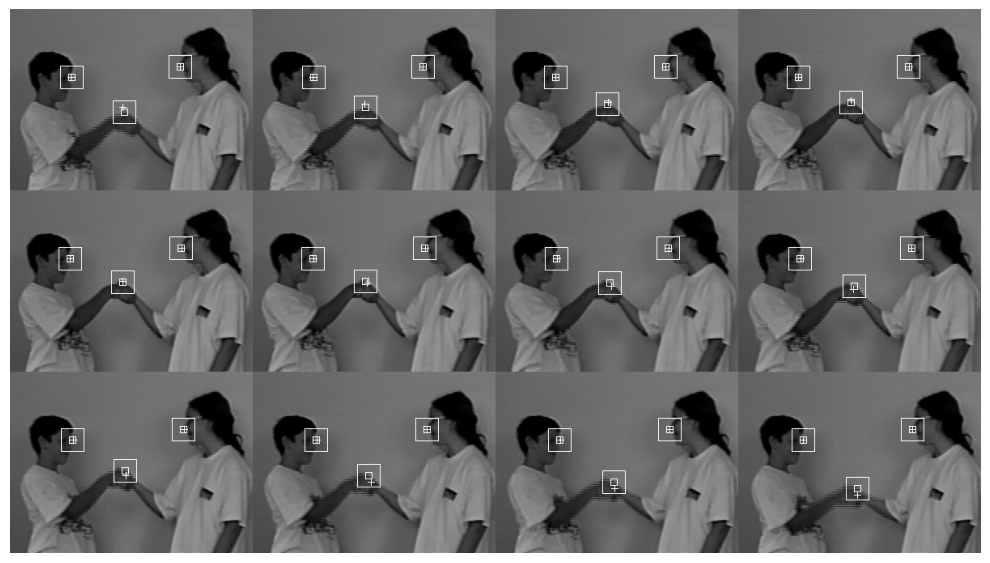

Tracked Hand.vx with three features defined by loc1
<scaled size: (672 x 1200) >


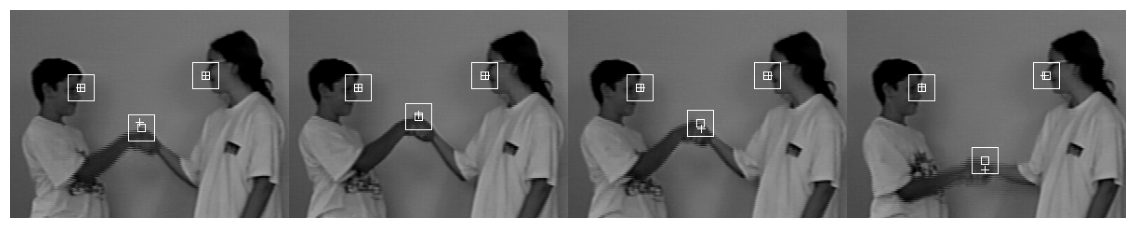

Four frames (1,4,9,14)from trk.vs
<scaled size: (224 x 1200) >


In [120]:
exec(vx.vxsh( 'vtrack if=hand.vs pf=loc1 h=10 v=10 of=trk.vs gf=trk.g' ))
exec(vx.vxsh( 'vtile trk.vs n=4,3 of=trkt.vs'))
vd.dispmvx('trkt.vs', size=1.8, capt="Tracked Hand.vx with three features defined by loc1" )

exec(vx.vxsh( 'vclip f=1 trk.vs of=dhand' )) 
for i in (4, 9, 14):
    exec(vx.vxsh( 'vclip f=$i trk.vs | vxfile of=dhand' ))
exec(vx.vxsh( 'vtile dhand n=4,1 of=dhandt' ))
vd.dispmvx("dhandt", size=1.8, capt="Four frames (1,4,9,14)from trk.vs")    

### Discussion

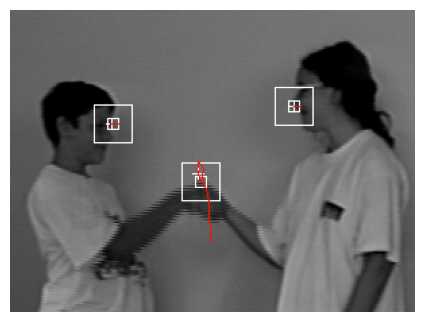

Time trajectories for the tracked feature points in 15 frames on first frame
<scaled size: (224 x 300) >


In [121]:
#  Create a binary image of the tracking trajectories. 
exec(vx.vxsh( 'vrend -w  trk.g of=trkt.vx' ))
#  Select the first image frame of the tracked results
exec(vx.vxsh( 'vclip f=1 if=trk.vs of=trk1.vx' ))
#  Add the tracking trajecctories as a color overlay
exec(vx.vxsh( 'vcmix  if=trk1.vx ig=trkt.vx | vccvt -i of=trkv.vx' ))
vd.dispmvx('trkv.vx', capt="Time trajectories for the tracked feature points in 15 frames on first frame")

Text(0.5, 1.0, 'trajectory data')

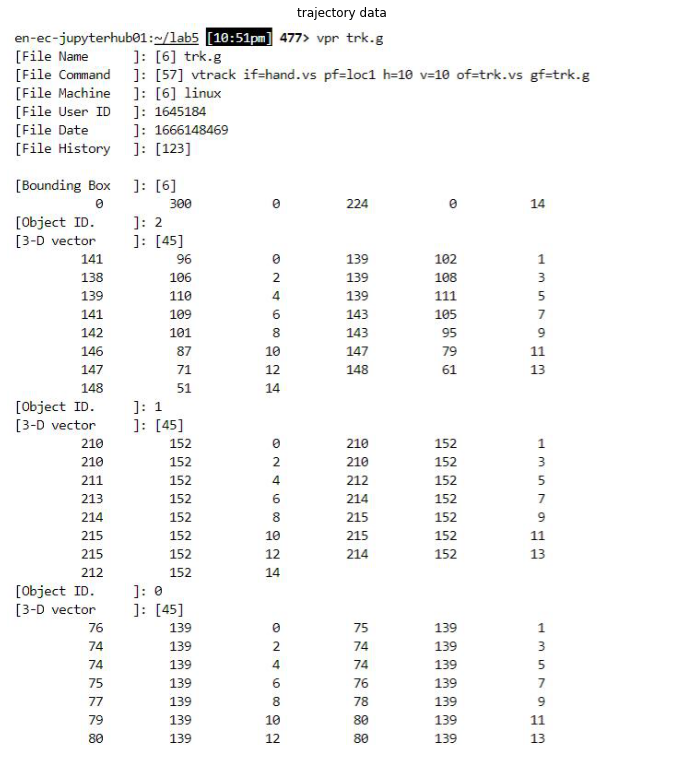

In [122]:
trajectory = mpimg.imread('trajectory_data.jpg')
plt.figure(figsize = (12, 16)) 
imgplot = plt.imshow(trajectory)
plt.axis('off') 
plt.title("trajectory data")

Using vtrack function, we created an image sequence named as trkt.vs tracking the features defined in the file loc1, specifically on the image, the features are the holding hands, and the edge of the faces. Then using the vtile function, we created a tiled image to display all 16 frames of the image sequence. Then by accessing the output gfile trk.g, we can find the trajectories, using vpr, vexcel, vrend we can compute a binary image of the trajectories saved as trkt.vx, and using vcmix and vccvt we can convert this to a true color image and display the trajectories in red color. From the simba viewer and the trajectory, we can see that the hands moves up first and then lowers slightly, just a normal process of shaking hands.


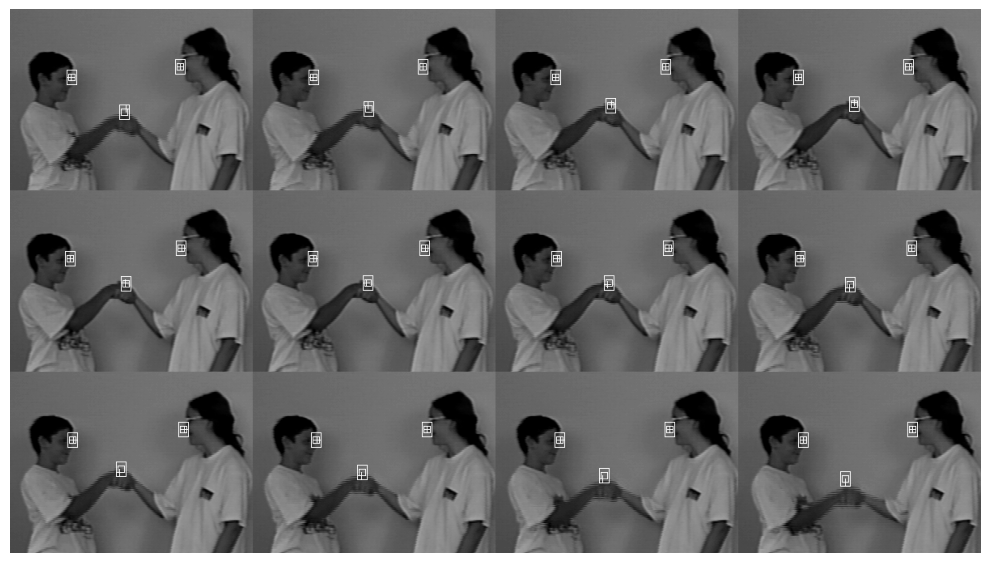

Tracked Hand.vx with h=2, v=5


<scaled size: (672 x 1200) >


In [123]:
exec(vx.vxsh( 'vtrack if=hand.vs pf=loc1 h=2 v=5 of=trk_t1.vs gf=trk_t1.g' ))
exec(vx.vxsh( 'vtile trk_t1.vs n=4,3 of=trkt_t1.vs'))
vd.dispmvx('trkt_t1.vs', size=1.8, capt="Tracked Hand.vx with h=2, v=5\n\n" )

In [124]:
exec(vx.vxsh( 'vtrack if=hand.vs pf=loc1 h=8 v=15 of=trk_t2.vs gf=trk_t2.g' ))
exec(vx.vxsh( 'vtile trk_t2.vs n=4,3 of=trkt_t2.vs'))

In the vtrack option, we have choose horizontal and vertical search size both as 10. We can obtain the trajectory data from vpr function and it will show us the object ID for each feature and all the 3d vector of its position in frames, it is displayed as (x, y, z) where x is the horizontal pixel, y is the vertical pixel and z is the frame number. From the data of the trajectory (as shown above), we can see that the maximum difference between the horizontal data is 3 (ID=2, from 143 to 146), that the maximum difference between the vertical difference is 10 in (ID=2, from 71 to 61, and from 61 to 71). In this case, to ensure that we can capture the feature, we want to make sure the that the search range is larger than maximum motion between frames. Therefore, we want to choose h >= 3, v >= 10. So the current parameter is fine. 

From the data, the motion is generally small and within the detect range, therefore, it can be considered as a very smooth motion. Therefore, in the vtile, we can hardly see the difference between two adjacent images using n=4,3 (12 frames) as the motion is too small, whereas using n=4,1 (only choosing 1, 4, 9, 14) the motions seems to be more obvious, especially from frame 9 to frame 14, though it might have skipped some important information due to the limited frames (such as the highest point of shaking hands).

Besides, how it determines what is the best match of the feature on the current frame (the position of the "+" sign) matters as well. From the frames, we can see that the "+" sign's corresponding position on the hand varies during the frame changes. Though we cannot see the internal code, but by assumption, we think this supposed to be consistent as a reference. In this case, how to determine the "+" sign is also a challenge for tracking. 

I tried three combinations of h and v for vtrack to see its performance: 1) the original h=10, v=10 (equal to the vertical motion maximum), 2) h=2, v=5(less than the vertical/horizontal maximum), 3) h=8, v=15 (more than the vertical/horizontal maximum) to test the possible cases for object tracking. As we can see from the original result and the two new results shown above, as we have discusses, having h or v equal or larger to the motion maximum both works the best for feature tracking. However, when the search range is less than the local minimum, it would lose track when the motion is larger (such as in frame 13, 14). 

As we mentioned earlier as well, the method can track features, though based on how we consider the "best match of the feature"(the + sign), the results may have a little deviation, but overall, the choice on the original parameters works well enough to track the features. And after we explored different sets of h and v of the vtrack function, we can see that the current choice would produce the optimal result of this algorithm already. Therefore, we can say that he results of the methods is reasonably precise. However, it is true that the algorithm may fail if we do not choose the h and v wisely. Choosing h or v too small would lose track of the feature as we mentioned previouly with the set h=2,v=5.

### 2.2 Tracking image annotation landmarks 

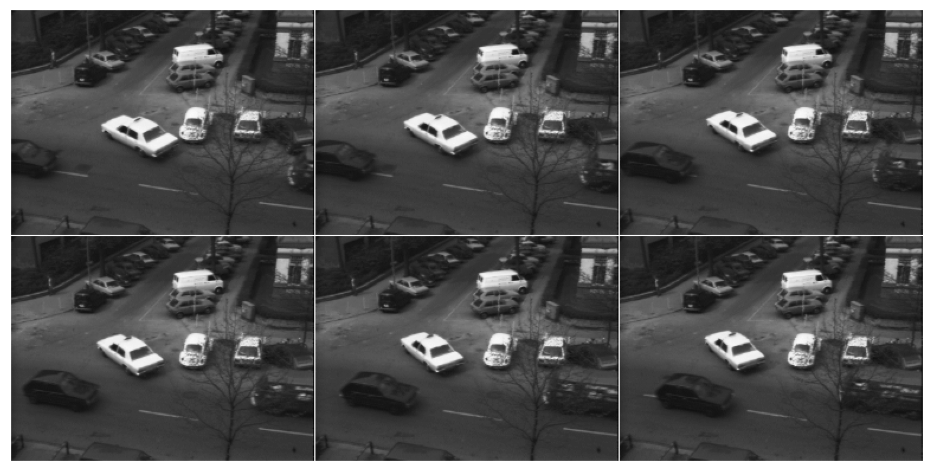

taxi.vs on selected frames: f=1, 5, 9, 13, 17, 20


<scaled size: (383 x 772) >


In [125]:
## Display the original image on selected frames ()
for i in (1, 5, 9, 13, 17, 20):
    exec(vx.vxsh( 'vclip f=$i taxi.vs | vxfile of=dtaxi2' ))
exec(vx.vxsh( 'vtile dtaxi2 n=3,2 -ib -xb of=dtaxit2' ))
vd.dispmvx("dtaxit2", size=1.5, capt="taxi.vs on selected frames: f=1, 5, 9, 13, 17, 20\n\n")

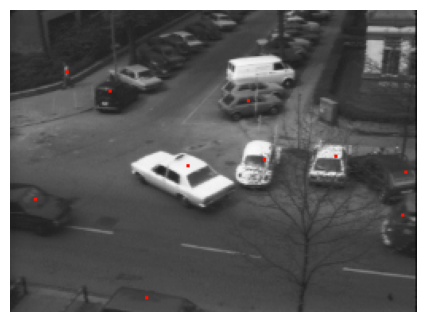

taxi.vs 10-features determined


<scaled size: (190 x 256) >


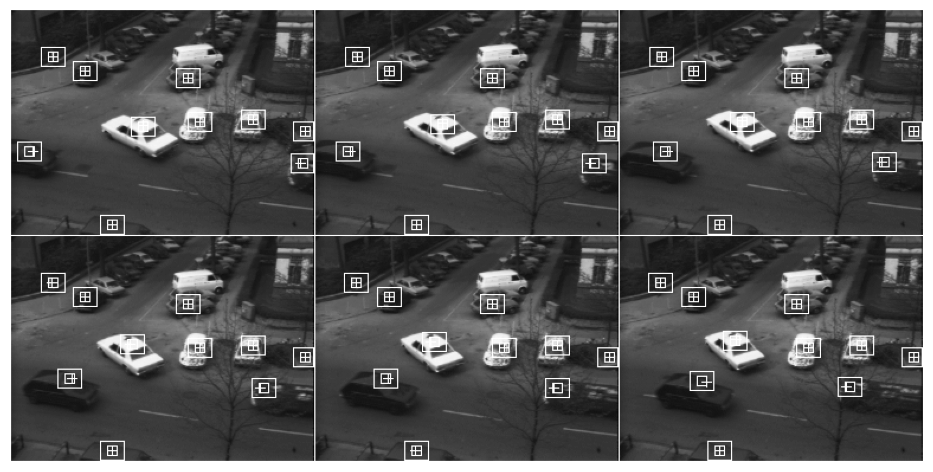

taxi.vs 11-feature tracking sequence on selected frames: f=1, 5, 9, 13, 17, 20 with h=6, v=4


<scaled size: (383 x 772) >


In [126]:
## store feature location and generate boundary file
exec(vx.vxsh ( 'vbbloc if=taxi.1.bb -vt -d2 of=loc2' ))
exec(vx.vxsh ( 'vbbloc if=taxi.1.bb -d2 ol=taxi.2.bb' ))
## generate feature tracking image sequence based on loc2
exec(vx.vxsh ( 'vtrack if=taxi.vs pf=loc2 h=6 v=4 of=taxi_tr.vs gf=taxi_tr.g' ))

## see all the frames to better choose the selected frames to represent the motion
# exec(vx.vxsh ( 'vtile taxi_tr.vs n=7,3 of=taxi_trkt.vs' ))
# vd.dispmvx('taxi_trkt.vs', size=1.8, capt="Tracked Hand.vx with h=2, v=5\n\n" )

exec(vx.vxsh ( 'vrend -w taxi.2.bb | vmorph s=2 -d of=taxit1.vx' ))
exec(vx.vxsh ( 'vclip f=1 taxi.vs of=taxi.vx' ))
exec(vx.vxsh ( 'vcmix if=taxi.vx ig=taxit1.vx | vccvt -i of=taxilm.vx' ))
vd.dispmvx('taxilm.vx', capt="taxi.vs 10-features determined\n\n")

## selected meaningful frames
for i in (1, 5, 9, 13, 17, 20):
    exec(vx.vxsh( 'vclip f=$i taxi_tr.vs | vxfile of=dtaxi1' ))
exec(vx.vxsh( 'vtile dtaxi1 n=3,2 -ib -xb of=dtaxi1t' ))
vd.dispmvx("dtaxi1t", size=1.5, capt="taxi.vs 11-feature tracking sequence on selected frames: f=1, 5, 9, 13, 17, 20 with h=6, v=4\n\n")

From the observations in Simba, we can see that there are three cars and a passenger moving. In this case, we want to choose all the moving objects as features and some adjacent static objects as references. Specifically, the two black car on the left/right edge, the middle white car that is turning, the passenger, as the moving objects, and 6 non-moving cars along the roads as static references, total of 10 features marked with red dots in the first graph. This would help us to see the small motions of the moving objects more clearly. From the experience in Section 2.1, we know that the selection on search range matters (should be larger than the motion maximum), in this case, I've used vpr method to check the 3-d vector results of the 10 features that I am tracking. By comparing the x and y across the frames, I see that the maximum horizontal motion is 4 and maximum vertical motion is 1, so I chose h=6 and v=4. Since we have 20 frames and I decided to include both the first and the last frame, I decided to choose 4 frames in between to represent the whole movement. This is to both provide enough information about the movement and not to miss any important motions (such as turning, speeding up, etc.).

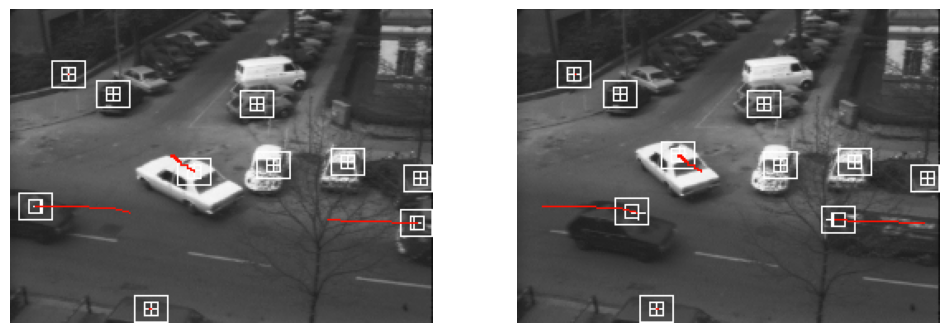

Time trajectories for the 10 feature tracked in 1st and 20th frame
<scaled size: (190 x 256) (190 x 256) >


In [127]:
#  Create a binary image of the tracking trajectories. 
exec(vx.vxsh( 'vrend -w  taxi_tr.g of=taxi_trkt.vx' ))
#  Select the first image frame of the tracked results
exec(vx.vxsh( 'vclip f=1 if=taxi_tr.vs of=taxi_trk1.vx' ))
#  Add the tracking trajecctories as a color overlay
exec(vx.vxsh( 'vcmix  if=taxi_trk1.vx ig=taxi_trkt.vx | vccvt -i of=taxi_trkv1.vx' ))

#  Select the first image frame of the tracked results
exec(vx.vxsh( 'vclip f=20 if=taxi_tr.vs of=taxi_trk20.vx' ))
#  Add the tracking trajecctories as a color overlay
exec(vx.vxsh( 'vcmix if=taxi_trk20.vx ig=taxi_trkt.vx | vccvt -i of=taxi_trkv20.vx' ))

vd.dispmvx('taxi_trkv1.vx', 'taxi_trkv20.vx', size = 1.5, capt="Time trajectories for the 10 feature tracked in 1st and 20th frame")

Above images tracks the features' movements, displaying the trajectories as red lines. I deliberately chose the first and the last frames as the reference. This choice makes sense as they shows "future motion" or "past motion" compared to their current position. From the images, we can see that the four objects that we assumed as moving are in fact moving. The white car is moving generally slower than the other two cars as it has a shorter trajectory. The curves of the trajectory also implied that there are some imperceptible turning action the car made that I might not clearly see with bare eyes in the simba viewer. The passenger's trajectory only has a red dot because he is walking very slowly compared to the cars. However, the lower feature (maybe a car or a trash bin or something) near the rail should be static in observation, but is detected as moving. This might have been an error due to camera shaking or other factors.

## 3 Temporal Domain Filtering

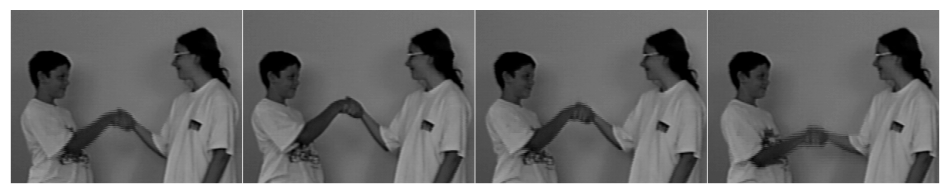

Original hand.vs on selected frames (1, 5, 9, 13)


<scaled size: (226 x 1205) >


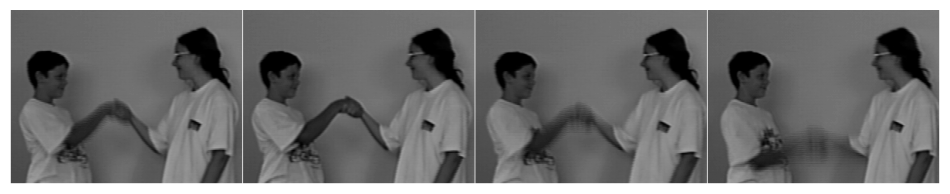

Results on vssump on hand.vs with n=3 on selected frames (1, 5, 9, 13)


<scaled size: (226 x 1205) >


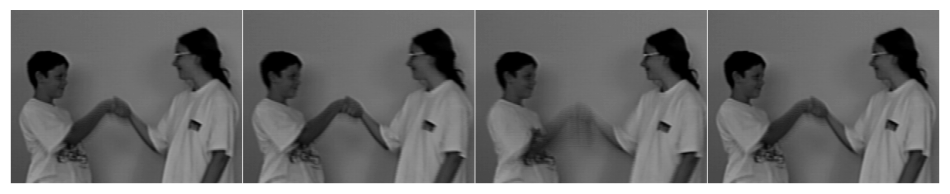

Results on vssump on hand.vs with  n=5 on selected frames (1, 4, 7, 10)


<scaled size: (226 x 1205) >


In [136]:
for i in (1, 5, 9, 13):
    exec(vx.vxsh( 'vclip f=$i hand.vs | vxfile of=dhan' ))
exec(vx.vxsh( 'vtile dhan n=4,1 -ib -xb of=dhant' ))
## select meaningful frames from hand.m and generate tile image
for i in (1, 5, 9, 13):
    exec(vx.vxsh( 'vclip f=$i hand.m | vxfile of=dhandm' ))
exec(vx.vxsh( 'vtile dhandm n=4,1 -ib -xb of=dhandmt' ))

## select meaningful frames from hand.m5 and generate tile image
for i in (1, 4, 7, 10):
    exec(vx.vxsh( 'vclip f=$i hand.m5 | vxfile of=dhandm5' ))
exec(vx.vxsh( 'vtile dhandm5 n=4,1 -ib -xb of=dhandm5t' ))
vd.dispmvx("dhant", size=1.5, capt="Original hand.vs on selected frames (1, 5, 9, 13)\n\n")
vd.dispmvx("dhandmt", size=1.5, capt="Results on vssump on hand.vs with n=3 on selected frames (1, 5, 9, 13)\n\n")
vd.dispmvx("dhandm5t", size=1.5, capt="Results on vssump on hand.vs with  n=5 on selected frames (1, 4, 7, 10)\n\n")

vssump is a temporal mean filter. It will take in an input image sequence and an predefined time range (used as input number of frames n), loop through each pixel and calculate the mean of the pixel value from the current frame(t) to the (t+n-1) frame, using the means to generate a new image. But this means that we'll lose some frames because they won't have enough frames following them to compute a successful temporal average. This is why n=3 only has 13 frames and n=5 only has 11 frames while the original total frame number is 15. 

The above selected image shows the result of vssump on hands.vs with n=3 and n =5. By calculating the mean, we can smooth out the motion captured, making it bl. In this case, even if the object in the current frame is static, it would still be a little blurred if it has motion in the near future. The motion is overall being blurred in perception. And the larger the n is the longer time it is considering. If n is chosen wisely so that most likely the n only cuts part of the motion, it would blur out the motion whereas when n is too large, the motion will become clearer again.

In [ ]:
#!/usr/bin/env python
""" vsmed: temporal median filtering """
from v4 import vx
from vxbuffer import *
import sys

vargs = vx.vaparse( "if= of= -v  - ")

if '-' in vargs:
    print ("vsmed 1x1xn local temporal median filter")
    print ("if= input file")
    print ("of= output file")
    print ("[-v] verbose mode for very small images")
    sys.exit(0)

for arg in ['if', 'of']:
    if arg not in vargs:
        print ('vsmed error: required parameter %s is missing' % arg)
        sys.exit(1)

optv = '-v' in vargs

invx = vxIbuf(vargs['if'], 3);
outvx = vxObuf(vargs['of'] ); 

im = invx.i
imr = empty( im[0].shape, dtype=im.dtype);

while invx.read():
    im = invx.i
    
    for y in range(im.shape[1] ):
        for x in range(im.shape[2]):
            temp_list = []
            
            for t in range (3):
                temp_list.append(im[t][y][x])
            
            sorted(temp_list)
            imr[y][x] = temp_list[1]
    
    if optv:
        print (imr)
    outvx.add(imr)
outvx.close()

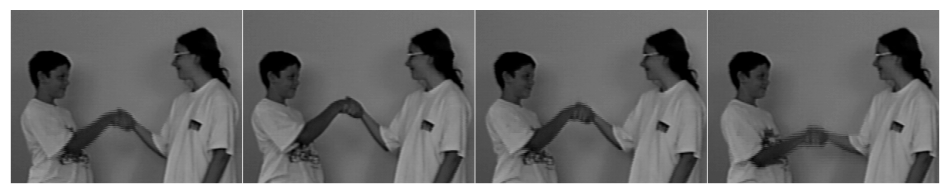

Original hand.vs on selected frames (1, 5, 9, 13)


<scaled size: (226 x 1205) >


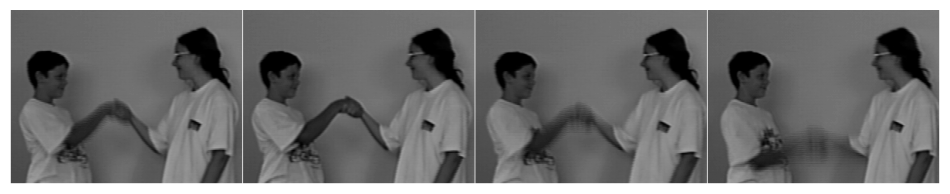

Results of vsmed on hand.vs on selected frames (1, 5, 9, 13)


<scaled size: (226 x 1205) >


In [150]:
for i in (1, 5, 9, 13):
    exec(vx.vxsh( 'vclip f=$i hand.vs | vxfile of=dhan' ))
exec(vx.vxsh( 'vtile dhan n=4,1 -ib -xb of=dhant' ))

exec(vx.vxsh ('vsmed hand.vs of=hand.m3'))
for i in (1, 5, 9, 13):
    exec(vx.vxsh( 'vclip f=$i hand.m3 | vxfile of=dhandm3' ))
exec(vx.vxsh( 'vtile dhandm n=4,1 -ib -xb of=dhandm3t' ))

vd.dispmvx("dhant", size=1.5, capt="Original hand.vs on selected frames (1, 5, 9, 13)\n\n")
vd.dispmvx("dhandm3t", size=1.5, capt="Results of vsmed on hand.vs on selected frames (1, 5, 9, 13)\n\n")

In the above results, we can see that the results of vsmed on hand.vs also blurs out the motion. However, it has lower smoothing effect than the temporal mean method as the features of the hands are still perceivable. Similar to temporal mean, it would also lose several frames at the end because the last two frames would not have enough following frames to generate a median. The difference is that here we arbitrarily set the time to be 3 frames, unlike in vssump, we can input a n as parameter. Also, since this is a median filter, it wouldn't generate a new pixel value, making the image preserving more characteristics of the original image.

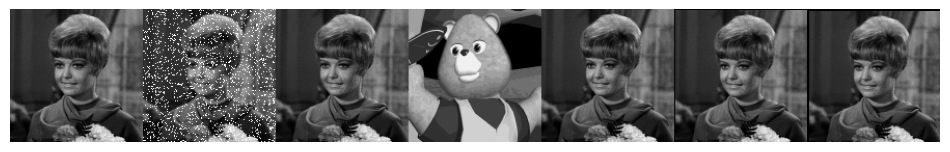

lb5.vs image sequence


<scaled size: (128 x 896) >


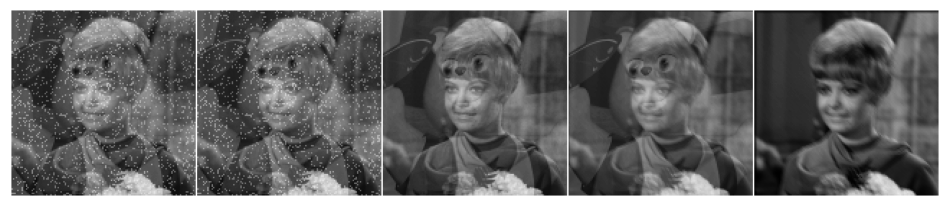

Results of vssump on lab5.vs with n=3


<scaled size: (130 x 646) >


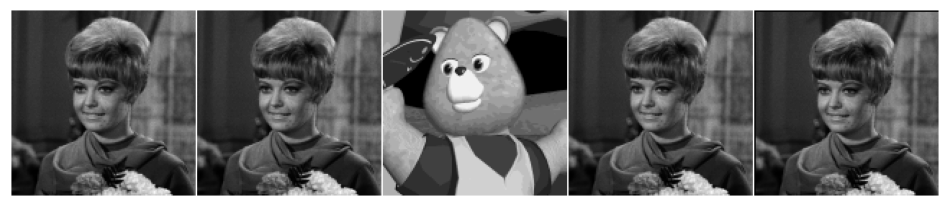

Results of vsmed on lab5.vs


<scaled size: (130 x 646) >


In [148]:
#Visualization of the lb5.vs image sequence
exec(vx.vxsh( 'vtile lb5.vs n=7,1 of=lb5.vt' ))

exec(vx.vxsh ('vssump lb5.vs n=3 of=lab5.m'))
exec(vx.vxsh( 'vtile lab5.m n=5,1 -ib -xb of=lab5t' ))

exec(vx.vxsh ('vsmed lb5.vs of=lab5.m3'))
exec(vx.vxsh( 'vtile lab5.m3 n=5,1 -ib -xb of=lab5m3t' ))

vd.dispmvx('lb5.vt', size=1.5, capt='lb5.vs image sequence\n\n')
vd.dispmvx("lab5t", size=1.5, capt="Results of vssump on lab5.vs with n=3\n\n")
vd.dispmvx("lab5m3t", size=1.5, capt="Results of vsmed on lab5.vs\n\n")

The above images shows the original lab5.vs sequence, the output of lab5.vs after vssump with n=3, and the output of lab5.vs after vsmed. From the result of vssump, we can see that the first frame would absorb noise (such as the white pepper-salt patterns), and the frames has also incorporated both the teddy and the girl. This makes it really hard to tell if the original image is about the girl or about the teddy. When the image has heavy noises, the average method would consider noise as important as the feature, which is against our expectation. This explains why the vssump has bad performance on this particular set of image.

The result of vsmed, however, is much better, it well preserves the features and remove the noise (salt and pepper) perfectly because it computes a median, meaning that it wouldn't consider noise as important as the feature (the noise is usually smaller or larger than the feature we care) and will not generate a new pixel value (mistakenly integrate other image information into the current frame). And therefore, it has a very nice performance on the lab5.vs image sequence.

Inputting two image in sequence would ensure that in the output of vsmed, the frame that taking the two sequential same image and a third other image has exactly the same content as the image that has the same contents sequentially arranged. This is because having two image with the same content would ensure that one of them is the median pixel chosen in the output.

## 4 Change Detection

In [ ]:
#!/usr/bin/env python
""" vsdif temporal binary difference method """
from v4 import vx
from vxbuffer import *
import sys

vargs = vx.vaparse( "if= of= th= -v  - ")


if '-' in vargs:
    print ("vsdif temporal binary difference filter")
    print ("if= input file")
    print ("of= output file")
    print ("th= difference threshold")
    print ("[-v] verbose mode for very small images")
    sys.exit(0)

for arg in ['if', 'of', 'th']:
    if arg not in vargs:
        print ('vsdif error: required parameter %s is missing' % arg)
        sys.exit(1)

optv = '-v' in vargs
thresh = int(vargs['th'])

invx = vxIbuf(vargs['if'], 2);
outvx = vxObuf(vargs['of'] ); 

im = invx.i

imr = empty( im[0].shape, dtype=im.dtype);
while invx.read():
    im = invx.i
    for y in range(im.shape[1] ):
        for x in range(im.shape[2]):
            if (abs((int)im[0][y][x] - (int)im[1][y][x]) > th):
                imr[y][x] = 255
            else:
                imr[y][x] = 0
    if optv:
        print (imr)
    
    outvx.add(imr)

outvx.close()


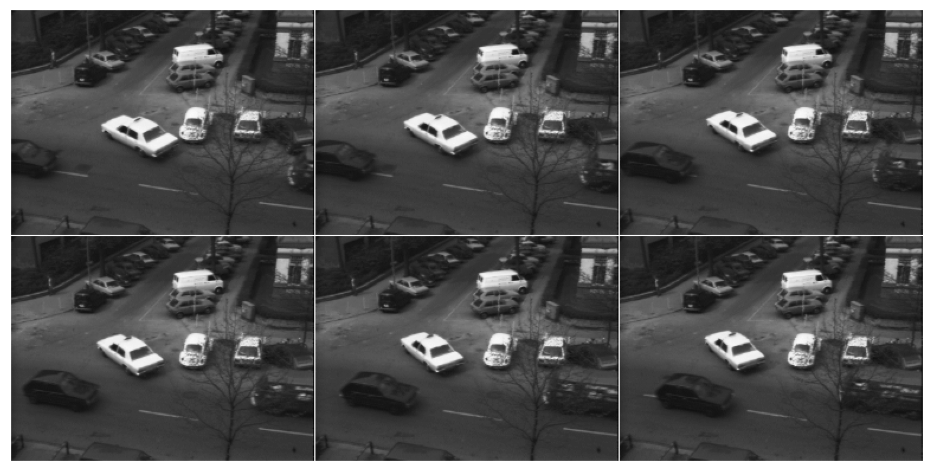

taxi.vs on selected frames: f=1, 5, 9, 13, 17, 20


<scaled size: (383 x 772) >


In [158]:
## Display the original image on selected frames ()
for i in (1, 5, 9, 13, 17, 20):
    exec(vx.vxsh( 'vclip f=$i taxi.vs | vxfile of=dtaxi2' ))
exec(vx.vxsh( 'vtile dtaxi2 n=3,2 -ib -xb of=dtaxit2' ))
vd.dispmvx("dtaxit2", size=1.5, capt="taxi.vs on selected frames: f=1, 5, 9, 13, 17, 20\n\n")

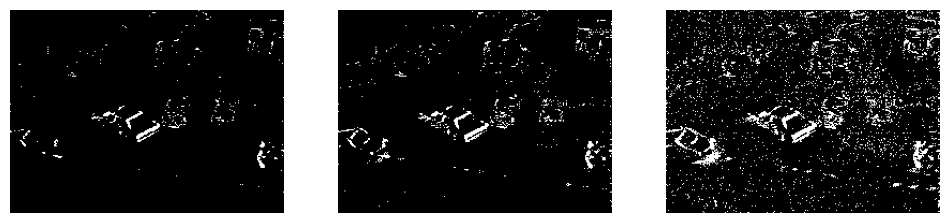

Results of vsdif on taxi.vs in frames 1: th=11, th=7, th=3


<scaled size: (190 x 256) (190 x 256) (190 x 256) >


In [22]:
## Testing different thresholds
exec(vx.vxsh ('vsdif th=11 if=taxi.vs of=taxi.m2'))
exec(vx.vxsh( 'vclip f=1 taxi.m2 of=dtaxi2' ))

exec(vx.vxsh ('vsdif th=7 if=taxi.vs of=taxi.m3'))
exec(vx.vxsh( 'vclip f=1 taxi.m3 of=dtaxi3' ))

exec(vx.vxsh ('vsdif th=3 if=taxi.vs of=taxi.m4'))
exec(vx.vxsh( 'vclip f=1 taxi.m4 of=dtaxi4' ))
vd.dispmvx("dtaxi2", "dtaxi3", "dtaxi4", size=1.5, capt="Results of vsdif on taxi.vs in frames 1: th=11, th=7, th=3\n\n")

From testing different thresholds as above, we can see that the if the threshold is too low, the image would have many noise points, if the image is too high, the feature maybe filtered out and become hard to perceive. Therefore, by trying multiple times, I've confined the range to approximately th=6 to th=9 where we can both see the feature clearly and don't have too many noise points. Among the appropriate range, I've decided th=7 as the optimal threshold. 

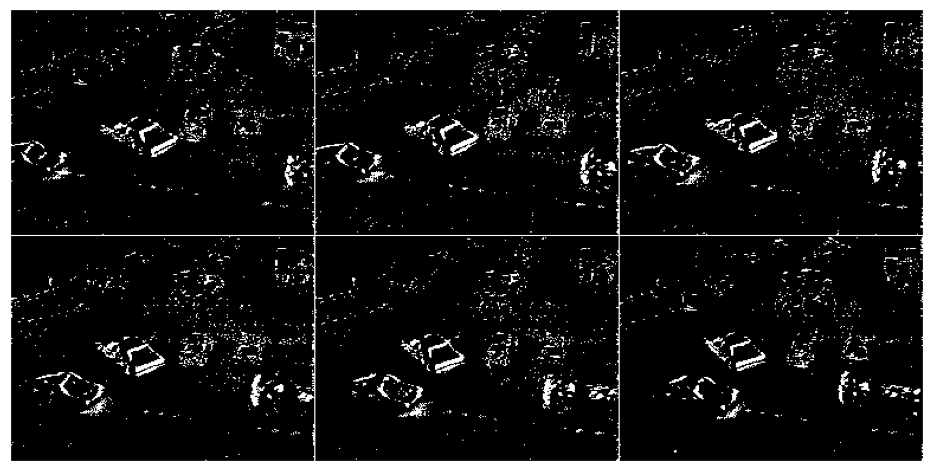

vsdif's optimal result of taxi.vs on selected frames: f=1, 5, 9, 13, 17, 20


<scaled size: (383 x 772) >


In [21]:
exec(vx.vxsh ('vsdif th=7 if=taxi.vs of=taxi.m3'))
for i in (1, 5, 9, 13, 17, 20):
    exec(vx.vxsh( 'vclip f=$i taxi.m3 | vxfile of=taxi_3' ))
exec(vx.vxsh( 'vtile taxi_3 n=3,2 -ib -xb of=taxit_3' ))
vd.dispmvx("taxit_3", size=1.5, capt="vsdif's optimal result of taxi.vs on selected frames: f=1, 5, 9, 13, 17, 20\n\n")

The above image shows the results of taxi.vs after temporal binary difference filtering with the optimal threshold th=7. This is the optimal solution if we want to still see all the features (including the static references such as cars parked along the roads) without having very heavy noises.

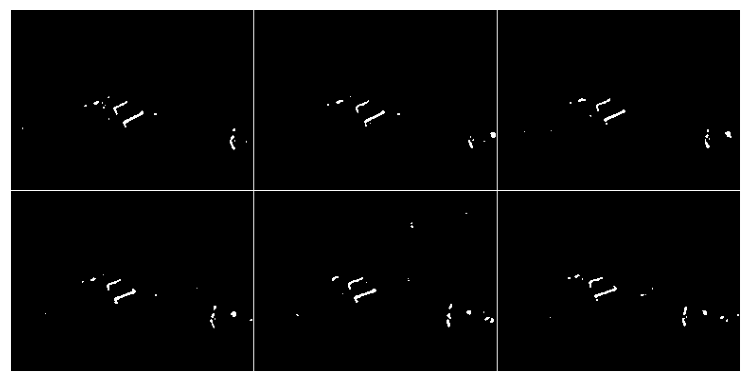

 vsdif (th=16) with median filtering of taxi.vs on selected frames: f=1, 4, 7, 10, 16


<scaled size: (383 x 772) >


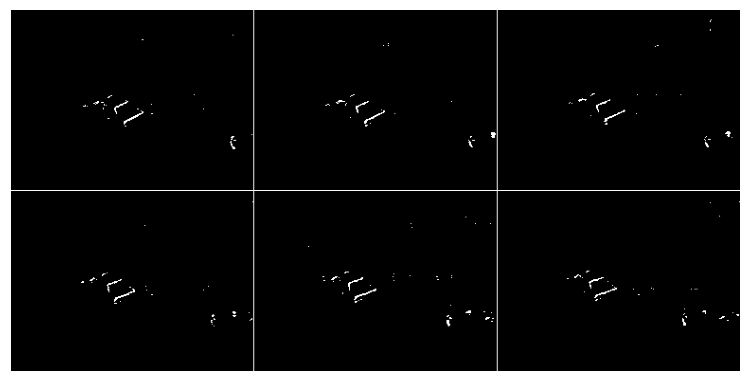

vsdif with higher threshold th=30 of taxi.vs on selected frames: f=1, 4, 7, 10, 16


<scaled size: (383 x 772) >


In [26]:
exec(vx.vxsh ('vsdif th=16 if=taxi.vs of=taxi.m33'))
exec(vx.vxsh ('vmedian if=taxi.m33 of=taxi.m34'))
for i in (1, 4, 7, 10, 13, 16):
    exec(vx.vxsh( 'vclip f=$i taxi.m34 | vxfile of=taxi_34' ))
exec(vx.vxsh( 'vtile taxi_34 n=3,2 -ib -xb of=taxit_34' ))
vd.dispmvx("taxit_34", size=1.2, capt=" vsdif (th=16) with median filtering of taxi.vs on selected frames: f=1, 4, 7, 10, 16\n\n")

exec(vx.vxsh ('vsdif th=30 if=taxi.vs of=taxi.m41'))
for i in (1, 4, 7, 10, 13, 16):
    exec(vx.vxsh( 'vclip f=$i taxi.m41 | vxfile of=taxi_42' ))
exec(vx.vxsh( 'vtile taxi_42 n=3,2 -ib -xb of=taxit_42' ))
vd.dispmvx( "taxit_42", size=1.2, capt="vsdif with higher threshold th=30 of taxi.vs on selected frames: f=1, 4, 7, 10, 16\n\n")

The results above shows that, if we want to only keep the two moving cars in the frame, there are two ways that can do this nicely. 

The first choice is to perform temporal binary thresholding first and apply median filtering to reduce the salt-pepper noise. When we choose a th>15, this works can successfully constrain the features to the two big moving cars(the middle white one, and the one on the right edge). However, after testing, we see that when th is too high, the right car is barely seen as well. So finally, I chose th=16 as the optimal solution. 

The second choice is to adjust the thresholding value of temporal binary thresholding to a high range so that anything that is moving slowly would be filtered out. In this case, I've chosen th =30. This provides a nice result as well with only the middle white car and the right edge car kept.